In [ ]:
# import libraries
import torch
import numpy as np

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# how many samples per batch to load
batch_size = 512

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

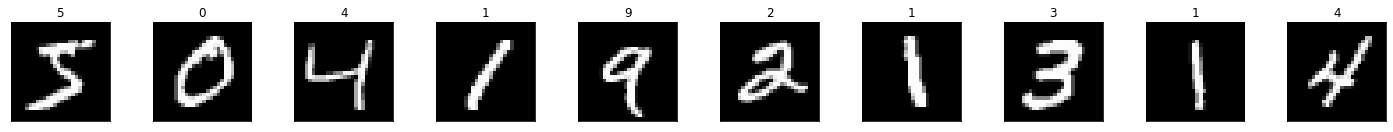

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

# **Define MLP Arch**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear( ,  ) 
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear( , )
        # linear layer (n_hidden -> ?)
        self.fc3 = nn.Linear(,)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, ) 
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
# training code
def train(model, optimizer, epochs=10):
    model.train() # prep model for training

    for epoch in range(n_epochs):
        # monitor training loss
        train_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for data, target in train_loader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)
            
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))

In [ ]:
# initialize lists to monitor test loss and accuracy
def test(model):
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # prep model for *evaluation*

    for data, target in test_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(data.shape[0]):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
# specify optimizer
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
train(model, optimizer)

In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
# specify optimizer
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
train(model, optimizer)
test(model)

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear( ,  ) 
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear( ,  )
        # linear layer (n_hidden -> n_hidden2)
        self.fc_extra = 
        # one more layer (n_hidden2 -> 10)
        self.fc3 = nn.Linear( ,  )

    def forward(self, x):
        # flatten image input
        x = x.view(-1, ) 
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc_extra(x))
        return x



In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
# specify optimizer
model = Net2()
optimizer = torch.optim.Adam(model.parameters(), lr=0.2) #lr=0.2
train(model, optimizer)
test(model)

In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
# specify optimizer
model = Net2()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)#lr=0.1 - what's the difference?
train(model, optimizer)
test(model)